In [5]:
"""
test_fft.py

Testing code for FFT, plotting, etc.

Author: Mahesh Venkitachalam
Website: electronut.in

"""

import numpy as np
import sys
from matplotlib import pyplot
from time import sleep
import argparse
import pyaudio
import math 

testing FFT...
Found 5 devices:
{'index': 0, 'structVersion': 2, 'name': 'Built-in Microphone', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.0029478458049886623, 'defaultLowOutputLatency': 0.01, 'defaultHighInputLatency': 0.01310657596371882, 'defaultHighOutputLatency': 0.1, 'defaultSampleRate': 44100.0}
Built-in Microphone
{'index': 1, 'structVersion': 2, 'name': 'Built-in Output', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.007800453514739229, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.017959183673469388, 'defaultSampleRate': 44100.0}
Built-in Output
{'index': 2, 'structVersion': 2, 'name': 'Soundflower (2ch)', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.0014512471655328798, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.011609977324263039, 'defaultSampl

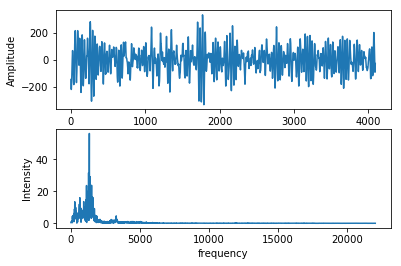

In [6]:
N = 4096

# get pyaudio input device
def getInputDevice(p):
    index = None
    nDevices = p.get_device_count()
    print('Found %d devices:' % nDevices)
    for i in range(nDevices):
        deviceInfo = p.get_device_info_by_index(i)
        print(deviceInfo)
        devName = deviceInfo['name']
        print(devName)
        # look for the "input" keyword
        # choose the first such device as input
        # change this loop to modify this behavior
        # maybe you want "mic"?
        if not index:
            if 'input' in devName.lower():
                index = i
    # print out chosen device
    if index is not None:
        devName = p.get_device_info_by_index(index)["name"]
        print("Input device chosen: %s" % devName)
    return index

# grab some audio data
def grabAudio(fileName):
    
    # initialize pyaudio
    p = pyaudio.PyAudio()

    # get pyAudio input device index
    inputIndex = getInputDevice(p)
    print("index: ", inputIndex)
    
    # set FFT sample length
    fftLen = N
    # set sample rate
    sampleRate = 44100

    print('opening stream...')
    stream = p.open(format = pyaudio.paInt16,
                    channels = 1,
                    rate = sampleRate,
                    input = True,
                    frames_per_buffer = fftLen,
                    input_device_index = inputIndex)
    loop = True
    first = True
    while loop:
        # read a chunk of data - discard first
        data  = stream.read(fftLen)
        if not first:
            f = open(fileName, 'wb')
            f.write(data)
            f.close()
            loop = False
        first = False
        
def showAudioFFT(fileName):
    f = open(fileName, 'rb')
    y = f.read()
    f.close()

    # audio data 
    x = range(N)
    y = np.frombuffer(y, np.int16)

    print("signal max: %f RMS: %f abs: %f " % (np.max(y), 
                                               np.sqrt(np.mean(y**2)), 
                                               np.mean(np.abs(y))))

    # FFT
    fft = np.abs(np.fft.rfft(y))*2.0/N
    freq = np.fft.rfftfreq(y.size, 1/44100.0)

    levels = [np.sum(fft[0:200])/200,
              np.sum(fft[200:1000])/800,
              np.sum(fft[1000:2500])/1500]

    print(levels)

    print("FFT max: %f " % (np.max(fft)))

    pyplot.title('Audio FFT')

    # plot audio
    pyplot.subplot(2, 1, 1)
    pyplot.plot( x, y, '-' )
    pyplot.xlabel('time')
    pyplot.ylabel('Amplitude')
    
    # plot FFT
    pyplot.subplot(2, 1, 2)
    pyplot.plot(freq, fft, '-' )
    pyplot.xlabel('frequency')
    pyplot.ylabel('Intensity')
    
    pyplot.show()

def showFuncFFT():

    # audio data 
    x = np.arange(N)
    y = 4*np.sin(10*2*math.pi*x/N) + 2.5*np.sin(30*2*math.pi*x/N) 

    # FFT
    fft = np.abs(np.fft.rfft(y))*2.0/N
    #freqs = range(len(fft))
    freqs = np.fft.rfftfreq(y.size, 1/N)

    pyplot.title('Function FFT')

    # plot audio
    pyplot.subplot(2, 1, 1)
    pyplot.plot( x, y, '-' )
    pyplot.xlabel('time')
    pyplot.ylabel('Amplitude')
    
    # plot FFT
    pyplot.subplot(2, 1, 2)
    pyplot.plot(freqs[:100], fft[:100], '-' )
    pyplot.xlabel('frequency')
    pyplot.ylabel('Intensity')
    
    #pyplot.subplots_adjust(bottom=-0.2)

    pyplot.show()


# main() function
def main():
    # use sys.argv if needed
    print('testing FFT...')
    
    grabAudio('song.bin')
    showAudioFFT('song.bin')
  
    #showFuncFFT()

# call main
if __name__ == '__main__':
    main()